In [1]:
# Useful for debugging
%load_ext autoreload
%autoreload 2

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

from matplotlib import pyplot as plt
import numpy as np

# Make field map layout for 25 GeV Pre-cooler Injector V.1.0
---
# Load and Scale Field Maps

In [2]:
from gpt.field_map import Map2D_E, Map1D_B, Map1D_TM

gun = Map2D_E('gun_0mm.gdf', column_names={'Z':'z', 'R':'r', 'Er':'Er', 'Ez':'Ez', '|E|':'|E|', 'V':'V'})
sol = Map1D_B('B_FIELD.gdf', column_names={'z':'z', 'Bz':'Bz'})
qwc0i = Map1D_TM('197MHz.gdf', column_names={'z':'z', 'Ez':'Ez'}, frequency=197e6) 
qwc3i = Map1D_TM('591MHz.gdf', column_names={'z':'z', 'Ez':'Ez'}, frequency=591e6) 

print('Minimum z in solenoid map:',min(sol['z']),'m')
print('Gun voltage:', gun.on_axis_integral/1e3, 'kV')

Minimum z in solenoid map: -0.3 m
Gun voltage: -500.04360197424995 kV


In [3]:
# Scale Gun to 1 keV gain
#guni.scale_fields(1000/np.abs(gun.on_axis_integral))
#guni.write_gdf('gun_0mm.v1.gdf')

#gun = Map2D_E('gun_0mm.v1.gdf', column_names={'Z':'z', 'R':'r', 'Er':'Er', 'Ez':'Ez', '|E|':'|E|', 'V':'V'})
#print('v.1.0 Gun voltage:', gun2.on_axis_integral/1e3, 'kV')

# Scale accelerating quater wave cavity map to 1 MeV gain @ beta=1 
qwc0i.scale_fields(1e6/qwc0i.energy_gain(qwc0i.oncrest_phase))
qwc0i.write_gdf('197MHz.v1.gdf')

qwc0 = Map1D_TM('197MHz.v1.gdf', column_names={'z':'z', 'Ez':'Ez'}, frequency=197e6) 
print('v.1.0 QWC f0 voltage:', qwc0.energy_gain(qwc0.oncrest_phase)/1e6, 'MeV')

# Scale 3rd harmonic cavity map to 1 MeV gain @ beta=1 
qwc3i.scale_fields(1e6/qwc3i.energy_gain(qwc3i.oncrest_phase))
qwc3i.write_gdf('591MHz.v1.gdf')

qwc3 = Map1D_TM('591MHz.v1.gdf', column_names={'z':'z', 'Ez':'Ez'}, frequency=591e6) 
print('v.1.0 QWC f3 voltage:', qwc3.energy_gain(qwc3.oncrest_phase)/1e6, 'MeV')

v.1.0 QWC f0 voltage: 0.9999977837315006 MeV
v.1.0 QWC f3 voltage: 0.9999733673658567 MeV


# Plot Layout

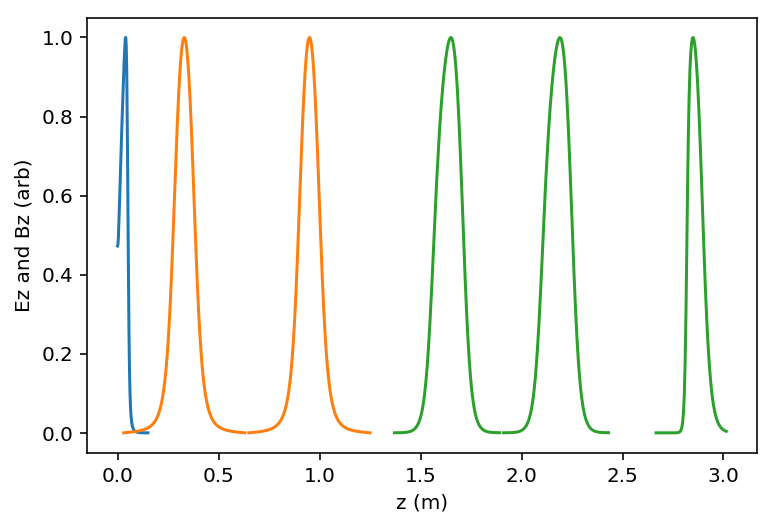

In [4]:
zgun = 0.15

sol1_z = 0.33
sol2_z = 0.95

cav1_z = 1.65
cav2_z = 2.19
cav3_z = 2.85

plt.plot(gun['Z']+zgun, np.abs(gun.on_axis_Ez)/np.max(np.abs(np.abs(gun.on_axis_Ez))), color='#1f77b4');
plt.plot(sol['z']+sol1_z, sol['Bz']/max(sol['Bz']), color='#ff7f0e');
plt.plot(sol['z']+sol2_z, sol['Bz']/max(sol['Bz']), color='#ff7f0e');

plt.plot(qwc0['z']+cav1_z, qwc0['Ez']/max(qwc0['Ez']), color='#2ca02c');
plt.plot(qwc0['z']+cav2_z, qwc0['Ez']/max(qwc0['Ez']), color='#2ca02c');
plt.plot(qwc3['z']+cav3_z, qwc3['Ez']/max(qwc3['Ez']), color='#2ca02c');

plt.xlabel('z (m)');
plt.ylabel('Ez and Bz (arb)');

# Write layout to file

In [5]:
lines = []

lines = lines + gun.gpt_lines('GUN01', f'fields/gun_0mm.gdf', r=[0,0,zgun], scale=400/500, user_vars=['z','scale'])
lines = lines + sol.gpt_lines('SOL01', f'fields/{sol.source_data_file}', r=[0,0,sol1_z], scale=3.5, user_vars=['z','scale'])
lines = lines + sol.gpt_lines('SOL02', f'fields/{sol.source_data_file}', r=[0,0,sol2_z], scale=2.5, user_vars=['z','scale'])

lines = lines + qwc0.gpt_lines('CAV01', f'fields/{qwc0.source_data_file}', r=[0,0,cav1_z], scale=2.5, user_vars=['z','scale','frequency'], auto_phase_index=0)
lines = lines + qwc0.gpt_lines('CAV02', f'fields/{qwc0.source_data_file}', r=[0,0,cav2_z], scale=1.0, user_vars=['z','scale','frequency'], auto_phase_index=1)
lines = lines + qwc3.gpt_lines('CAV03', f'fields/{qwc3.source_data_file}', r=[0,0,cav3_z], scale=0.333, user_vars=['z','scale','frequency'], auto_phase_index=2)

for line in lines:
    print(line)

GUN01_z = 0.15;
GUN01_scale = 0.8;
Map2D_E("wcs", 0, 0, GUN01_z, 1, 0, 0, 0, 1, 0, "fields/gun_0mm.gdf", "R", "Z", "Er", "Er", GUN01_scale);
SOL01_z = 0.33;
SOL01_scale = 3.5;
Map1D_B("wcs", 0, 0, SOL01_z, 1, 0, 0, 0, 1, 0, "fields/B_FIELD.gdf", "z", "Bz", SOL01_scale);
SOL02_z = 0.95;
SOL02_scale = 2.5;
Map1D_B("wcs", 0, 0, SOL02_z, 1, 0, 0, 0, 1, 0, "fields/B_FIELD.gdf", "z", "Bz", SOL02_scale);
CAV01_z = 1.65;
CAV01_scale = 2.5;
CAV01_oncrest_phase = 0;
CAV01_relative_phase = 0;
CAV01_phase = (CAV01_oncrest_phase + CAV01_relative_phase)*pi/180;
CAV01_gamma = 1;
phasing_amplitude_0 = CAV01_scale;
phasing_on_crest_0 = CAV01_oncrest_phase;
phasing_relative_0  = CAV01_relative_phase;
phasing_gamma_0 = CAV01_gamma;
CAV01_frequency = 197000000.0;
Map1D_TM("wcs", 0, 0, CAV01_z, 1, 0, 0, 0, 1, 0, "fields/197MHz.v1.gdf", "z", "Ez", CAV01_scale, CAV01_phase, 2*pi*CAV01_frequency);
CAV02_z = 2.19;
CAV02_scale = 1.0;
CAV02_oncrest_phase = 0;
CAV02_relative_phase = 0;
CAV02_phase = (CAV02_oncres

In [115]:
space_charge_lines ="""
#--------------------------------------------------------------------------
# INITIAL DISTRIBUTION
#--------------------------------------------------------------------------
setfile("beam", "gpt.particles.gdf"); 
#--------------------------------------------------------------------------


#--------------------------------------------------------------------------
# ACCURACY AND INTEGRATION PARAMETERS
#--------------------------------------------------------------------------
RadiusMax = 0.04;
GBacc =5.5;
xacc  =6.5;
accuracy(GBacc, xacc);
dtmin =1e-16;
dtmax =1e-10;
#--------------------------------------------------------------------------


#--------------------------------------------------------------------------
# Spacecharge Parameters
#--------------------------------------------------------------------------
space_charge = 1;

Alpha  =1;    # 1.0   (manual default is 1.0), (bigger is better)
Fn     =0.5;  # 0.5   (manual default is 0.5), (smaller is better)
verror =0.005;# 0.005 (manual default is 0.01), (smaller is better)
Nstd   =5;    # 5     (manual default is 5), (bigger is better)

if(space_charge==1) {
    spacecharge3Dmesh("MeshNfac", Alpha, "MeshAdapt", Fn, "SolverAcc", verror, "MeshBoxSize", Nstd);
}
#--------------------------------------------------------------------------


#--------------------------------------------------------------------------
# OUTPUT PARAMETERS
#--------------------------------------------------------------------------
auto_phase=0;
Ntout = 50.0;  
tmax = 8e-9;  

ZSTART = -0.5;
ZSTOP = 4.0;
zminmax("wcs", "I", ZSTART, ZSTOP);

tout(0, tmax, tmax/Ntout);

screen("wcs", "I", 3.75);
#--------------------------------------------------------------------------


#--------------------------------------------------------------------------
# FIELD MAPS
#--------------------------------------------------------------------------
"""

#with open('../gpt.in','w') as fid:
#    fid.writelines(space_charge_lines)
#    for line in lines:
#        fid.write(line+'\n')